In [1110]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [1111]:
def rieman_central(f, df, x):
    diff = x[1] - x[0]
    size = x.size
    y = []
    dfReal = []
    for i in range(size - 1):
        # 21 tidak dibutuhkan di hasil akhir, data sampai 21
        # agar bisa mencari hasil di 20.
        if (i == size - 1):
            continue
        yaksen = 0
        for j in range(size - 1):
            yaksen = (f(x[j]) + f(x[j + 1])) / 2
        # Cek apakah infinite
        if (f(x[i]) == float("inf") or df(x[i]) == float("inf")):
            yaksen = float("inf")
        else:
            yaksen = x[i] * yaksen
        y.append(yaksen)
        dfReal.append(df(x[i]))

    # Kita return hasil asli nya juga dari fungsi integralnya.
    return y, dfReal


def trapezoid(f, x):
    size = x.size
    y = []
    a = 0
    for i in range(size - 1):
        b = x[i]
        n = 2
        h = (b - a) / (n - 1)
        # 2 titik karena trapezoid membagi menjadi 2 daerah
        xdata = np.linspace(a, b, 2)
        l = 0
        for j in xdata[1:n - 1]:
            l += f(j)
        yaksen = (f(xdata[0:1]) + (2 * l) + f(xdata[-1::])) * (h / 2)
        # karena hasil yaksen adalah array berisi 1, maka kita append
        # index 0 karena cuman 1
        y.append(yaksen[0])
    return y


def simpson(f, x):
    size = x.size
    y = []
    a = 0
    for i in range(size - 1):
        b = x[i]
        n = 4
        h = (b - a) / (n - 1)
        # kita menggunakan 1/3 rule karena panel nya adalah genap
        # jika kita mempunyai ganjil data, maka panelnya adalah genap
        xdata = np.linspace(a, b, n)
        f1 = f(xdata)
        i_simp = (h / 3) * (f1[0] + (4 * sum(f1[1:n - 1:2]) +
                                     (2 * sum(f1[:n - 2:2]))) + f1[n - 1])
        if i == 8:
            y.append(float("inf"))
            continue
        y.append(i_simp)
    return y


def f(x):
    if (x - 8 == 0).all():
        return float("inf")
    else:
        return (1 / (x - 8)**5) + 1.5


def df(x):
    if (x - 8 == 0).all():
        return float("inf")
    else:
        return (1.5 * x) - (1 / (4 * (x - 8)**4))

In [1112]:
# Untuk data, kita menggunakan interval atau h nya 1
# Karena memakai ketiga metode itu, yang terakhir akan hilang
# kita akan mencari sampai 21 agar 20 nya dapat sehingga
# hasil integral 0 - 20 bisa dicari.
x = np.arange(0, 22, 1)
# x dari 0 - 20
xprint = np.arange(0, 21, 1)
a = 0
b = 20
n = x.size
rieman_central, dfReal = rieman_central(f, df, x)
trapezoid = trapezoid(f, x)
simpson = simpson(f, x)

# testcase = 2, 6, 8, 10, 14
def print_hasil(i):
    print(f"Integral di titik {xprint[i]} yang asli adalah {dfReal[i]}")
    print(f"Integral di titik {xprint[i]} menggunakan Central Riemann adalah {rieman_central[i]}")
    print(f"Integral di titik {xprint[i]} menggunakan Trapezoid adalah {trapezoid[i]}")
    print(f"Integral di titik {xprint[i]} menggunakan Simpson adalah {simpson[i]}")
    print("\n")


print_hasil(2)
print_hasil(6)
print_hasil(8)
print_hasil(10)
print_hasil(14)

Integral di titik 2 yang asli adalah 2.999807098765432
Integral di titik 2 menggunakan Central Riemann adalah 3.0000067120664635
Integral di titik 2 menggunakan Trapezoid adalah 2.99984088159883
Integral di titik 2 menggunakan Simpson adalah 2.6665758314646


Integral di titik 6 yang asli adalah 8.984375
Integral di titik 6 menggunakan Central Riemann adalah 9.00002013619939
Integral di titik 6 menggunakan Trapezoid adalah 8.906158447265625
Integral di titik 6 menggunakan Simpson adalah 7.9787626959822955


Integral di titik 8 yang asli adalah inf
Integral di titik 8 menggunakan Central Riemann adalah inf
Integral di titik 8 menggunakan Trapezoid adalah inf
Integral di titik 8 menggunakan Simpson adalah inf


Integral di titik 10 yang asli adalah 14.984375
Integral di titik 10 menggunakan Central Riemann adalah 15.000033560332318
Integral di titik 10 menggunakan Trapezoid adalah 15.156097412109375
Integral di titik 10 menggunakan Simpson adalah 13.365945738428657


Integral di titik 14

C:\Users\fabian\AppData\Local\Temp\ipykernel_1304\1555812494.py:71: RuntimeWarning: divide by zero encountered in true_divide
  return (1 / (x - 8)**5) + 1.5


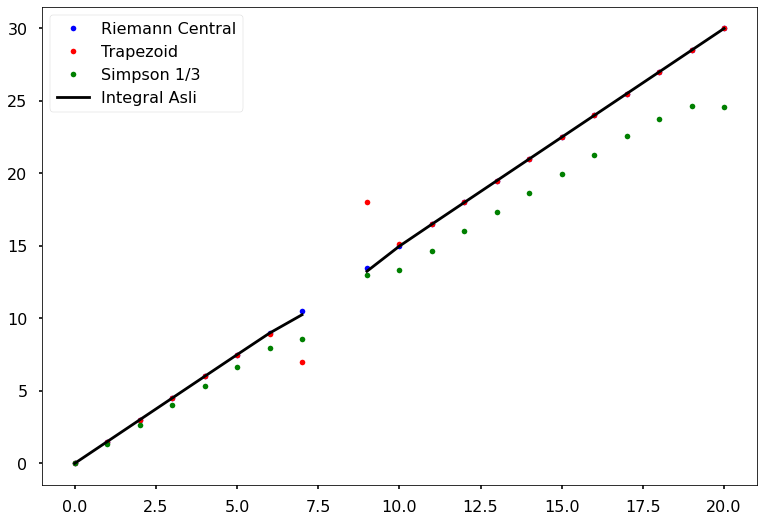

In [1113]:
plt.plot(xprint, rieman_central, "b.")
plt.plot(xprint, trapezoid, "r.")
plt.plot(xprint, simpson, "g.")
plt.plot(xprint, dfReal, "k")
plt.legend(["Riemann Central", "Trapezoid", "Simpson 1/3", "Integral Asli"])
plt.show()